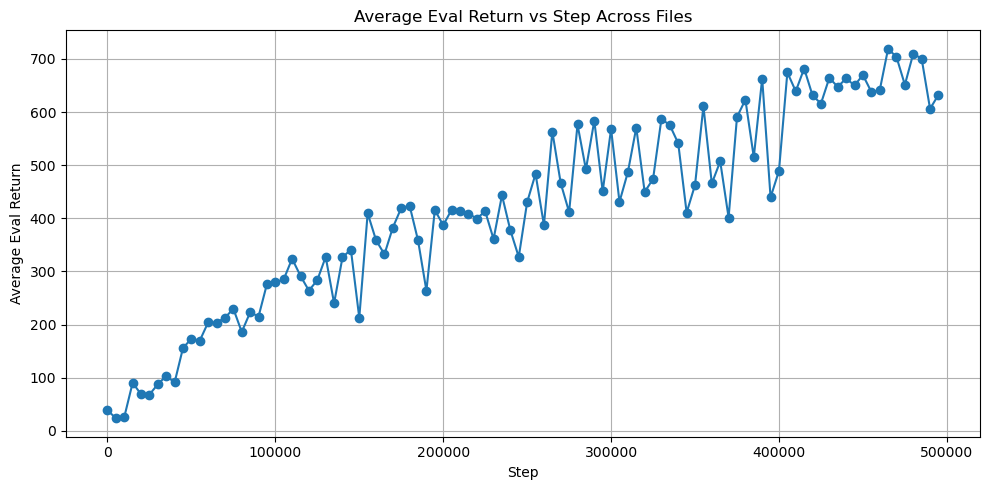

In [4]:
import json
import matplotlib.pyplot as plt
from collections import defaultdict
import glob

# Replace with your actual file names or use glob to match them
file_paths = ['/home/richtsai1103/CRL/MBRL_with_Isolated_Imaginations/iso_rl/log/dmcbg_walker_walk/iso_1/metrics.jsonl',
              '/home/richtsai1103/CRL/MBRL_with_Isolated_Imaginations/iso_rl/log/dmcbg_walker_walk/iso/metrics.jsonl', 
              '/home/richtsai1103/CRL/MBRL_with_Isolated_Imaginations/iso_rl/log/dmcbg_walker_walk/iso_2/metrics.jsonl']  # or use glob.glob('*.json')

# Dictionary to collect eval_returns by step
step_to_returns = defaultdict(list)

# Process each file
for path in file_paths:
    with open(path, 'r') as f:
        for line in f:
            try:
                data = json.loads(line)
                if 'eval_return' in data:
                    step = data['step']
                    eval_return = data['eval_return']
                    step_to_returns[step].append(eval_return)
            except json.JSONDecodeError:
                continue

# Compute average eval_return per step
steps = sorted(step_to_returns.keys())
avg_returns = [sum(vals) / len(vals) for step, vals in sorted(step_to_returns.items())]

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(steps, avg_returns, marker='o', linestyle='-')
plt.xlabel('Step')
plt.ylabel('Average Eval Return')
plt.title('Average Eval Return vs Step Across Files')
plt.grid(True)
plt.tight_layout()
plt.show()
